# [Scatter(산점도) 살펴보기]
-corr()

In [31]:
import pandas as pd
import numpy as np

In [32]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v
df = pd.DataFrame([(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
                  columns=['dogs', 'cats'])
df.corr(method=histogram_intersection)

,dogs,cats
dogs,1.0,0.3
cats,0.3,1.0


## (2) 데이터 준비

In [33]:
file="../DATA/auto-mpg.csv"

## (3) 데이터 불러오기

In [34]:
![autoMpg](https://archive.ics.uci.edu/static/public/9/Thumbnails/Large.jpg?13)

zsh:1: unknown file attribute: h


In [35]:
mpgDF = pd.read_csv(file, sep="\s+", 
                    names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"])
# columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
mpgDF


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [36]:
mpgDF.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [37]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- 실제 데이터의 값의 종류 즉 고유값 확인 => unique() / nunique()
    * 각 컬럼의 이상한 값 즉, 이상치 확인
    * 각 컬럼의 값의 종류 및 범위
    * 각 컬럼의 실제 데이터 타입 

In [38]:
for col in mpgDF.columns:
    print(f"================= {col} =================")
    print(mpgDF[col].unique(), end="\n\n")
    print(mpgDF[col].nunique(), end="\n\n")
    print(mpgDF[col].nunique(dropna=False))
    # dropna 파라미터 설정으로 컬럼의 결측치 데이터 수까지 확인 가능
    print("\n\n")

================= mpg =================
[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]

129

129



================= cylinders =================
[8 4 6 3 5]

5

5



================= displacement =================
[307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  2

## (5) 데이터 전처리
- 결측치 체크 => 꼭 NaN이 아닐 수 있음
- 중복값 체크
- 이상치 체크 => 이상치 컬럼의 범위를 벗어난 값, 잘못 입력된 값
- 데이터 표준화 => 자료형, 데이터 단위 일치
- 데이터 정규화 => 데이터의 크기 일치

### (5)-1 결측치 체크 및 처리 ==> 
horse power는 결측치는 없지만 이상치가 있음 이 이상치를 NaN으로

In [39]:
mpgDF.horsepower.nunique()

94

In [40]:
mpgDF.horsepower.value_counts()

horsepower
150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
         ..
61.00     1
93.00     1
148.0     1
152.0     1
82.00     1
Name: count, Length: 94, dtype: int64

In [41]:
mpgDF.horsepower.value_counts()["?"]

6

In [42]:
mpgDF["horsepower"].replace("?", np.nan, inplace=True)

In [43]:
mpgDF.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [44]:
mpgDF.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### (5)-2 표준화 ==> 연속형 즉 수치 자료형 -----> 범주형 자료형 변환
- 46~230 범위 실수 수치값 ===> 저출력/중출력/고출력
- 구간 분할 (Binning)

In [45]:
mpgDF.horsepower=mpgDF.horsepower.astype("float32")

In [46]:
mpgDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float32
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [47]:
pd.cut(np.array([1,7,5,4,6,3]), 3)

[(0.994, 3.0], (5.0, 7.0], (3.0, 5.0], (3.0, 5.0], (5.0, 7.0], (0.994, 3.0]]
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]

In [48]:
pd.cut(np.array([1,7,5,4,6,3]), 3, labels=["A", "B", "C"])

['A', 'C', 'B', 'B', 'C', 'A']
Categories (3, object): ['A' < 'B' < 'C']

In [49]:
pd.cut(mpgDF.horsepower, bins = 3, labels = ["저마력", "중마력", "고마력"], retbins=True)
# out, ret이 나온다(ret은 구간 정보)

(0      중마력
 1      중마력
 2      중마력
 3      중마력
 4      중마력
       ... 
 393    저마력
 394    저마력
 395    저마력
 396    저마력
 397    저마력
 Name: horsepower, Length: 398, dtype: category
 Categories (3, object): ['저마력' < '중마력' < '고마력'],
 array([ 45.816     , 107.33333333, 168.66666667, 230.        ]))

In [50]:
out, ret = pd.cut(mpgDF.horsepower, bins = 3, labels = ["저마력", "중마력", "고마력"], retbins=True)
type(out), ret

(pandas.core.series.Series,
 array([ 45.816     , 107.33333333, 168.66666667, 230.        ]))

In [51]:
mpgDF['horsepower'] = out

In [52]:
s =pd.Series(list('abca'))
s

0    a
1    b
2    c
3    a
dtype: object

In [53]:
pd.get_dummies(s)

,a,b,c
0,True,False,False
1,False,True,False
2,False,False,True
3,True,False,False


### (5-3) 데이터 표준화 => 범주형 ==> 연속형 / 수치화 변환 : One-Hot-Encoing 방식

In [54]:
# pandas.get_dummies() 함수
# mpgDF에 origin 컬럼을 변환 ==> 1,2,3

In [55]:
mpgDF.origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: origin, Length: 398, dtype: int64

In [61]:
pd.get_dummies(mpgDF.origin)

,EU,JPN,USA
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
393,False,False,True
394,True,False,False
395,False,False,True
396,False,False,True


In [62]:
pd.get_dummies(s, dtype="int32")

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


In [57]:
# pandas.get_dummies() 함수
# mpgDF에 origin 컬럼을 변환 ==> 'USA', 'EU', 'JPN' 변환

In [58]:
mpgDF['origin'].replace({1:'USA', 2:'EU', 3:'JPN'}, inplace=True)

In [59]:
mpgDF['origin']=mpgDF['origin'].astype('category')

In [64]:
mpgDF.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower      category
weight           float64
acceleration     float64
model year         int64
origin          category
car name          object
dtype: object

### <hr> (6) 데이터 분석
#### (6-1) 연비 mpg 컬럼과 관계가 가장 높은 컬럼

In [94]:
# 상관계수 수치화 확인 ---------------------------------
corrDF = mpgDF.corr(numeric_only=True)
corrDF['mpg'][1:]

cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

In [95]:
corrDF['mpg'][1:].sort_values()

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
acceleration    0.420289
model year      0.579267
Name: mpg, dtype: float64

In [96]:
mpg = round(corrDF['mpg']['weight'],2)

In [102]:
### 시각화로 연비 mpg 컬럼의 관계 확인 -------------------------
import matplotlib.pyplot as plt

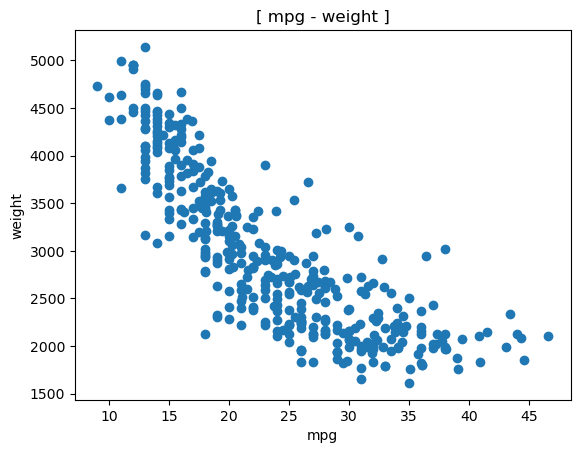

In [113]:
plt.scatter(mpgDF['mpg'], mpgDF['weight'])
plt.xlabel('mpg')
plt.ylabel('weight')
plt.title('[ mpg - weight ]')
plt.show()

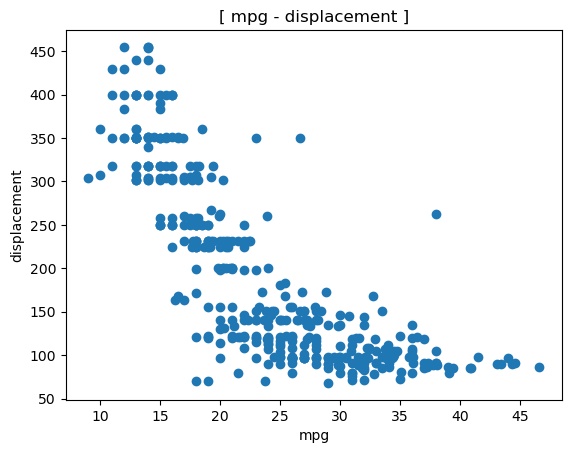

In [114]:
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.title('[ mpg - displacement ]')
plt.show() # 로 가능하지만 반복이기 때문에 아래처럼 함수로 만듦

In [122]:
def scatterplot(sr1, sr2):
    '''
    parameters:
    sr1, sr2 : Series object
    '''
    plt.scatter(sr1, sr2)
    plt.title(f'{sr1.name} - {sr2.name} [{round(corrDF[sr1.name][sr2.name],2)}]')
    plt.xlabel(sr1.name)
    plt.ylabel(sr2.name)
    plt.show()

In [123]:
def printScatter(col1, col2):
    '''
    parameters:
    col1, col2 : Columns name
    '''
    plt.scatter(mpgDF[col1], mpgDF[col2])
    plt.title(f'{col1} - {col2} : {corrDF[col1][col2]}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

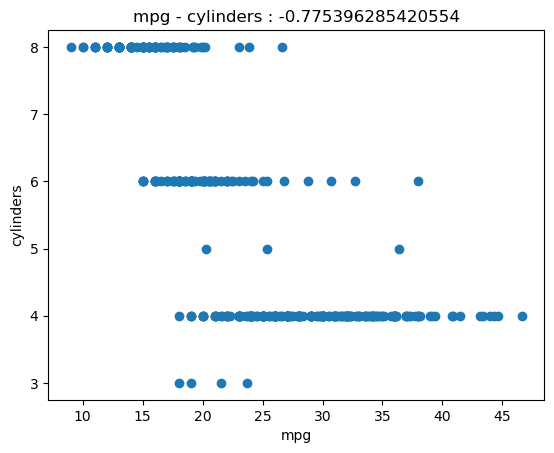

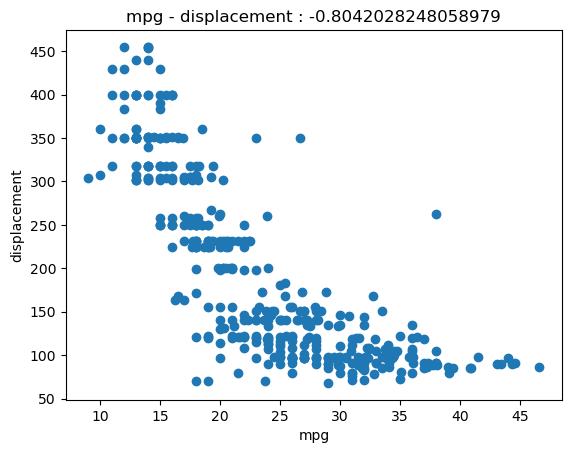

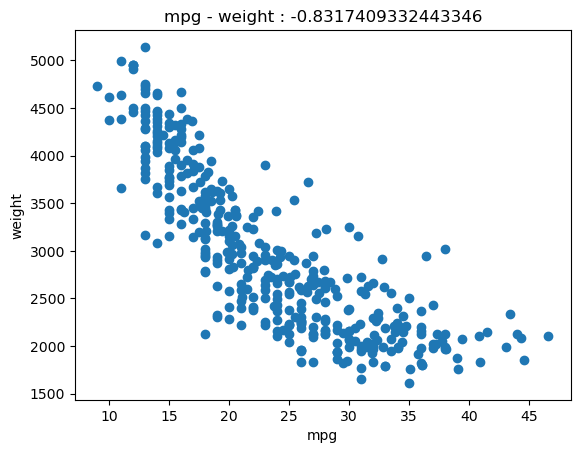

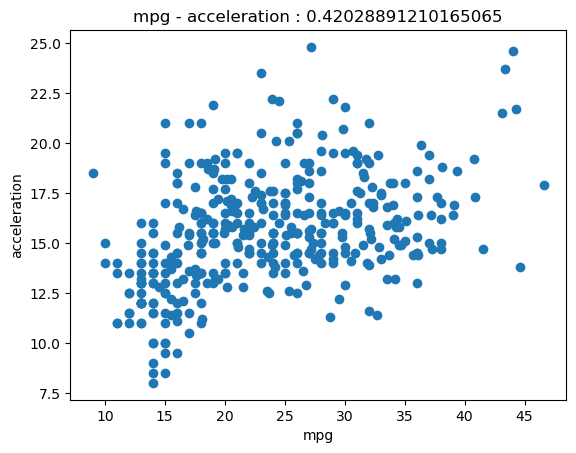

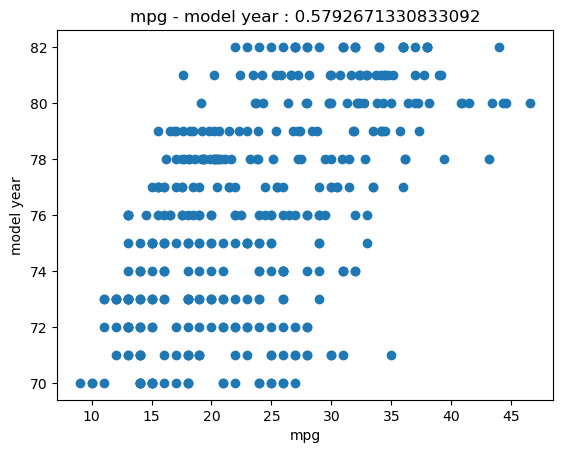

In [124]:
for col in corrDF.columns[1:]:
    printScatter('mpg', col)

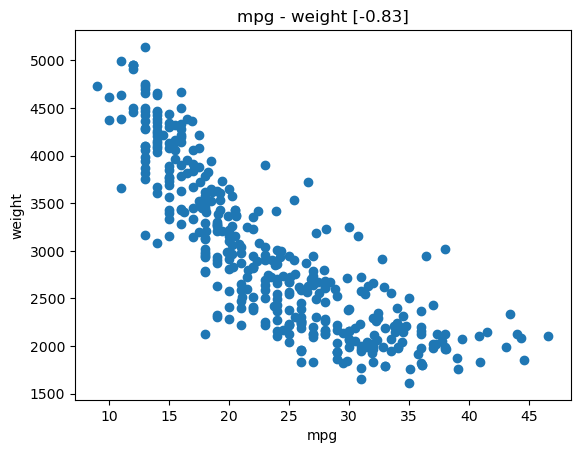

In [121]:
scatterplot(mpgDF['mpg'], mpgDF['weight'])

### (6-2) 자동차 제조사의 비율

In [127]:
originSR = mpgDF['origin'].value_counts()
originSR.index, originSR.values

(CategoricalIndex(['USA', 'JPN', 'EU'], categories=['EU', 'JPN', 'USA'], ordered=False, dtype='category', name='origin'),
 array([249,  79,  70]))

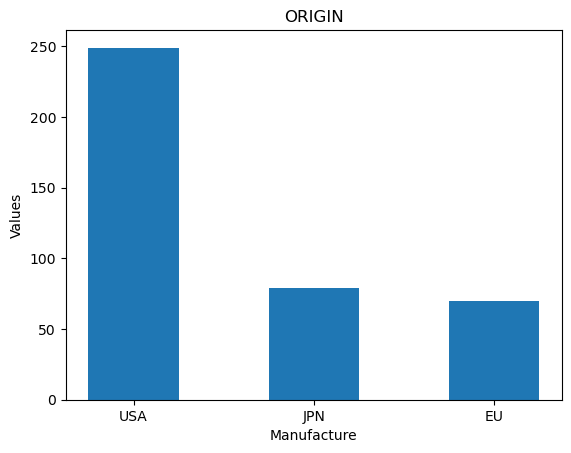

In [144]:
plt.bar(originSR.index, originSR.values, width = 0.5)
plt.title('ORIGIN')
plt.xlabel('Manufacture')
plt.ylabel('Values')
# plt.legend()
plt.show()

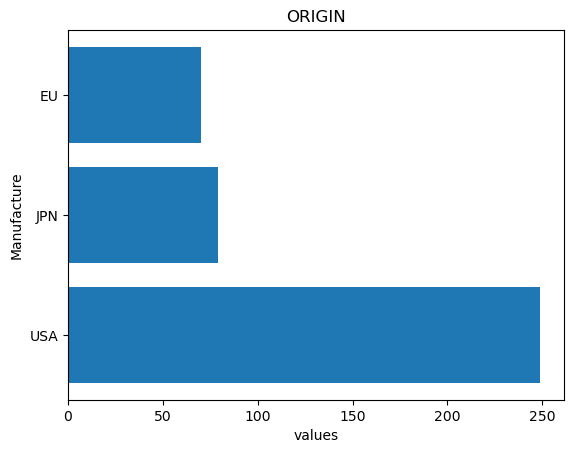

In [146]:
plt.barh(originSR.index, originSR.values, height = 0.8)
plt.title('ORIGIN')
plt.xlabel('values')
plt.ylabel('Manufacture')
# plt.legend()
plt.show()

- 다중 그래프

- 방법 1) fig.ax= plt.subplots()
- 방법 2) plt.subplot(행, 열, 인), plt.subplot(3, 1, 1), plt.subplot(3, 1, 2), plt.subplot(3, 1, 3))

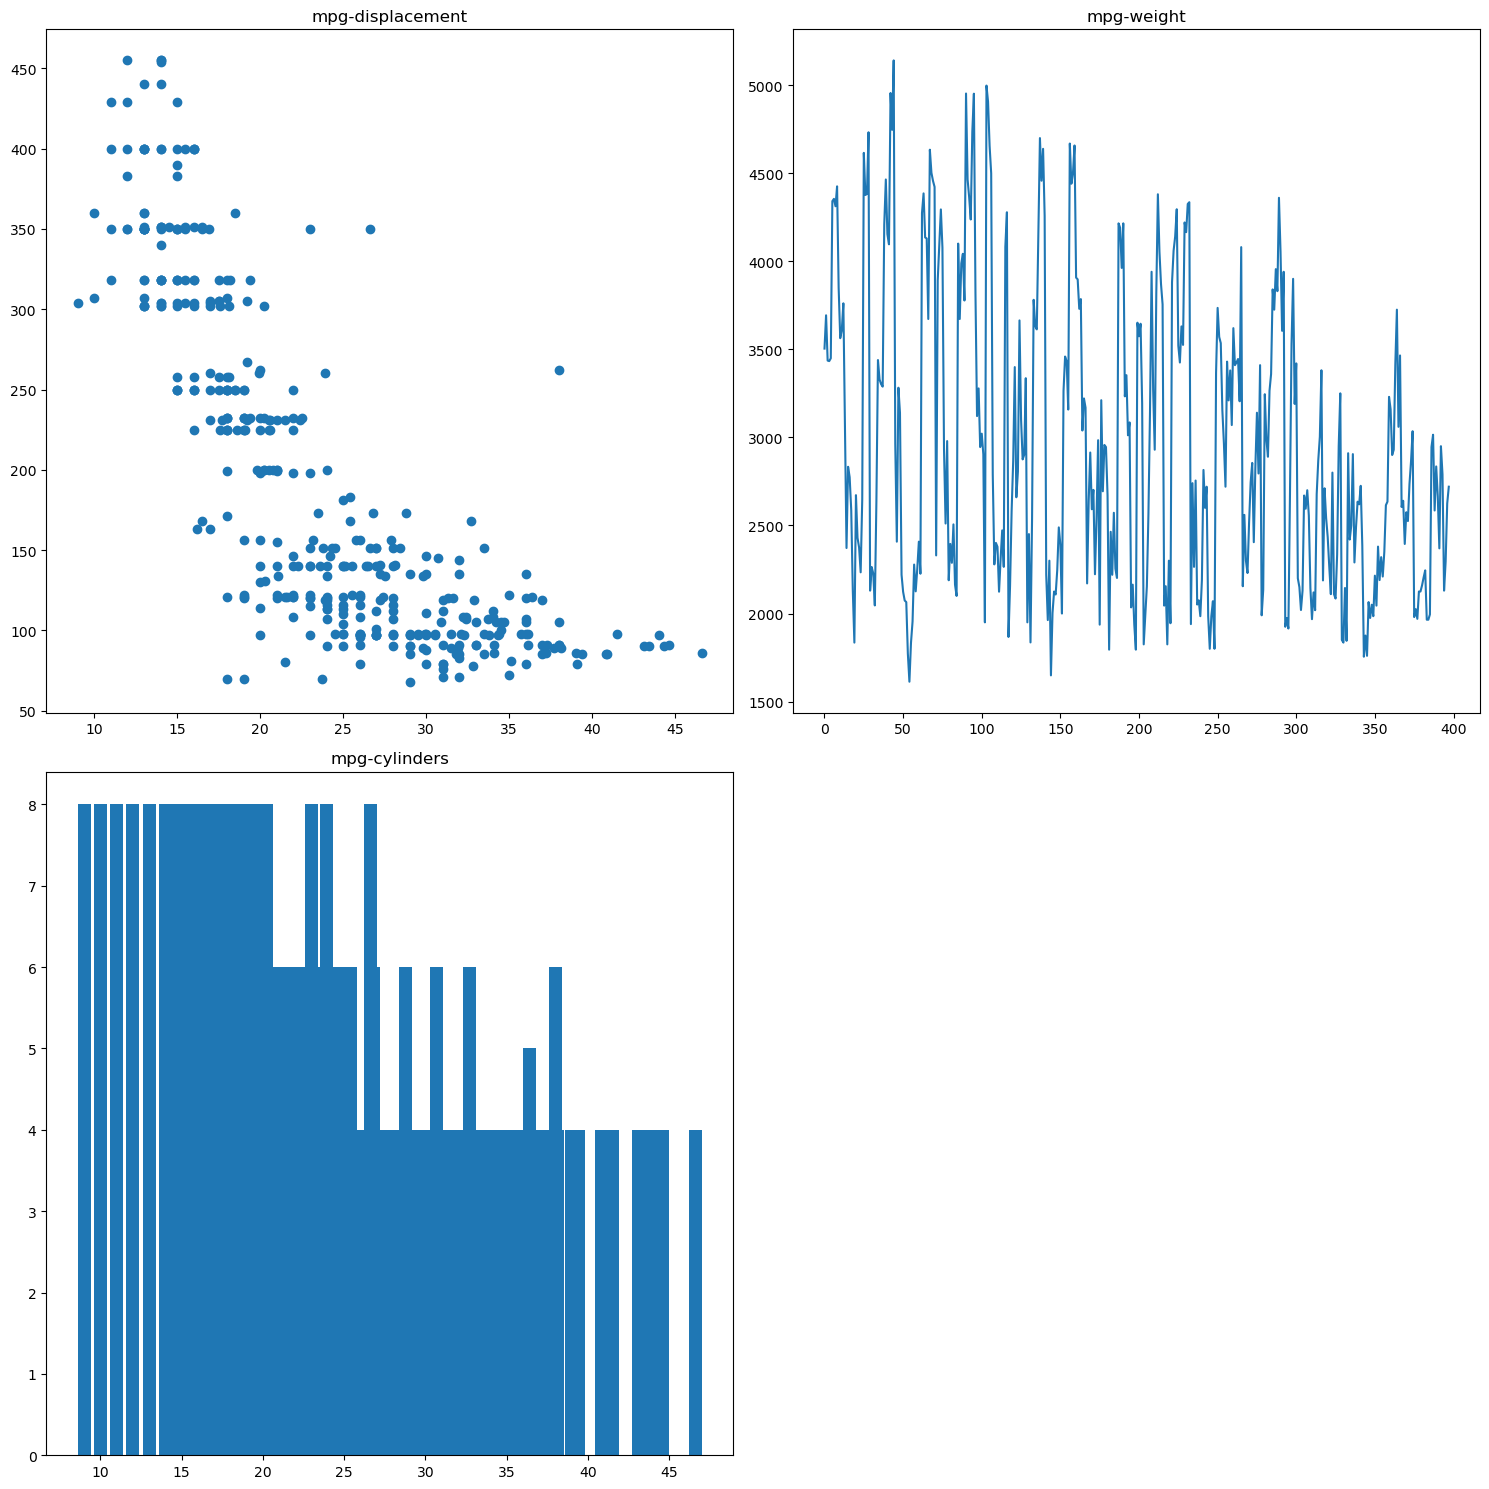

In [161]:
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)        #2행 2열 중 첫 번째
plt.scatter(mpgDF['mpg'], mpgDF['displacement'])
plt.title("mpg-displacement")

plt.subplot(2,2,2)          # 2행 2열 중 두 번째
plt.plot(mpgDF['weight'])
plt.title("mpg-weight")

plt.subplot(2,2,3)          # 2행 2열 중 세 번째
plt.bar(mpgDF['mpg'], mpgDF['cylinders'])
plt.title("mpg-cylinders")

plt.tight_layout() # 여러 개의 그래프가 겹치지 않게 최소한의 여백 지정해주는 함수
plt.show()

/var/folders/9y/lpn0hjmn5csct06t4_r5qtjr0000gn/T/ipykernel_14903/651935594.py:16: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


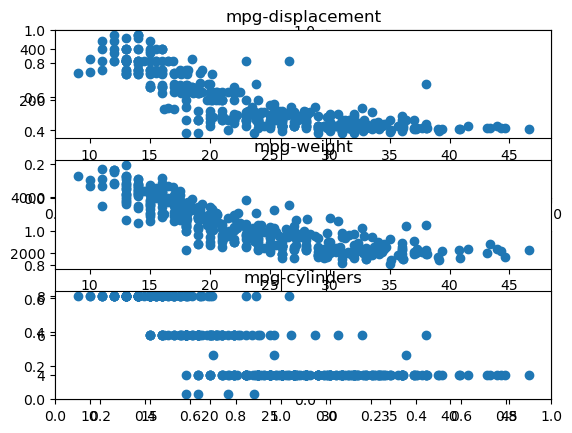

In [174]:
fig, ax = plt.subplots(2, 2)

ax1 = fig.add_subplot(311)
ax1.scatter(mpgDF['mpg'], mpgDF['displacement'])
ax1.set_title("mpg-displacement")

ax2 = fig.add_subplot(312)
ax2.scatter(mpgDF['mpg'], mpgDF['weight'])
ax2.set_title("mpg-weight")

ax3 = fig.add_subplot(3,1,3)
ax3.scatter(mpgDF['mpg'], mpgDF['cylinders'])
ax3.set_title("mpg-cylinders")


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Simple plot')

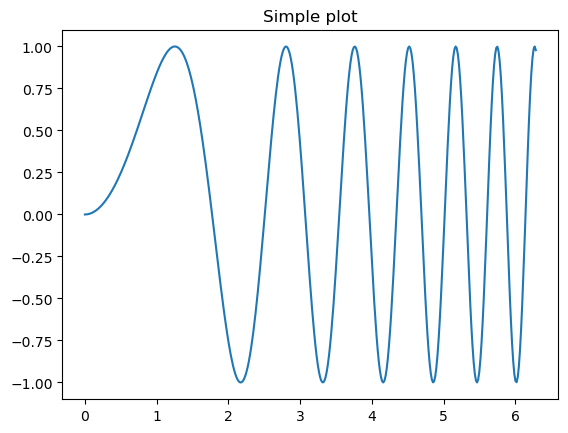

In [176]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')


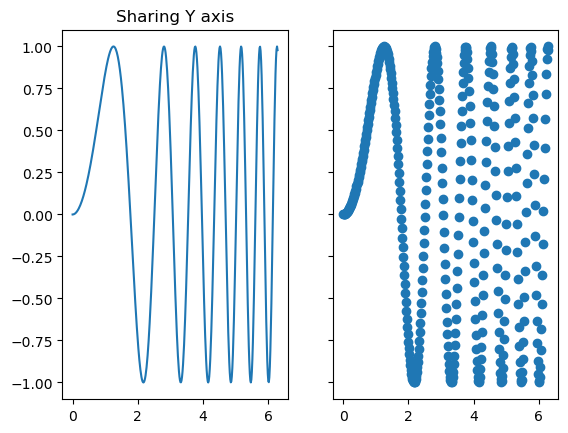

In [177]:

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) #sharey는 y점선값이 공유된다는 것
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)


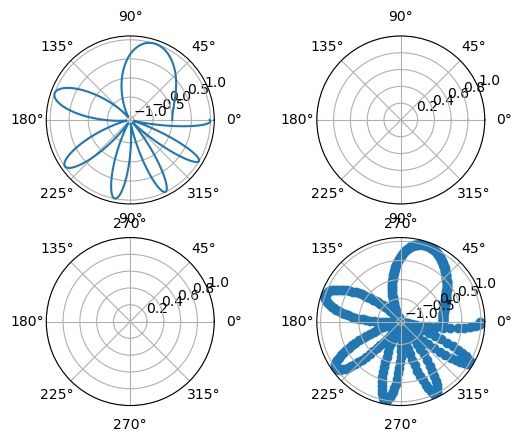

In [179]:

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar")) # 2행 2열 정렬에 이런 그래프 그려라
axs[0, 0].plot(x, y)        # [0,0]에 plot    선 그래프
axs[1, 1].scatter(x, y)     # [1,1]에 scatter 산점도 그래프
                            # [0,1], [1,0]은 없음

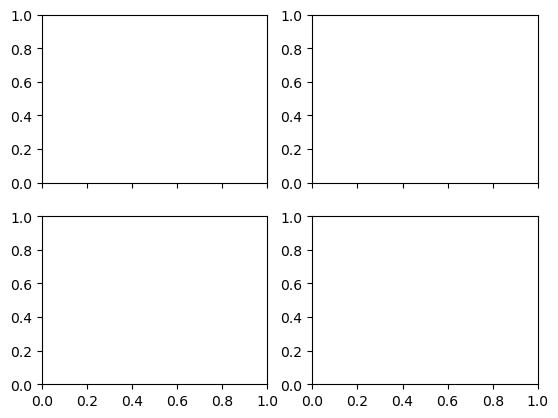

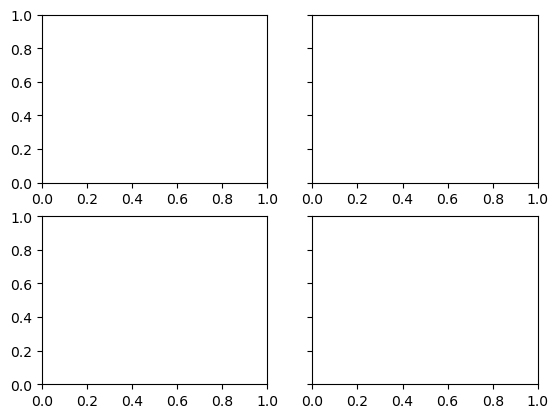

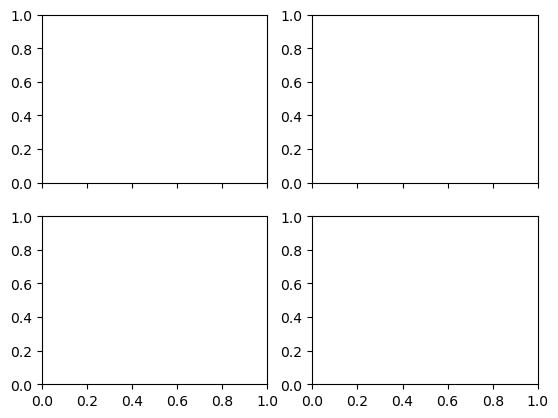

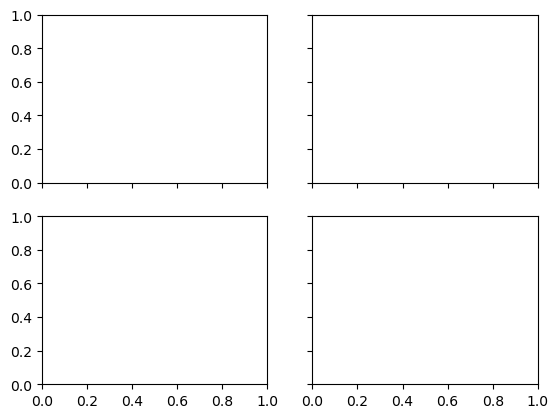

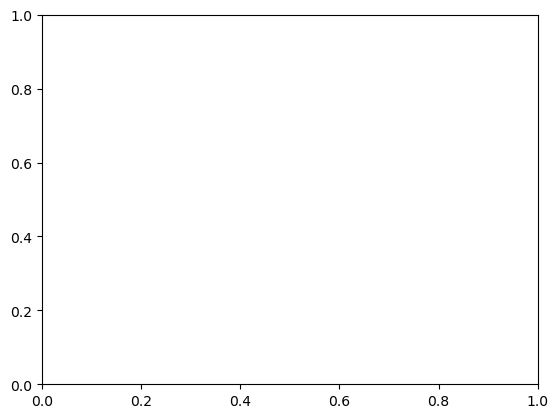

In [181]:
        
# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')                  # x축 눈금을 열값으로 공유

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')                  # y축 눈금을 행값으로 공유

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')    # x,y축 눈금 공유

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)      # x, y축 눈금 공유

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)        # 10개

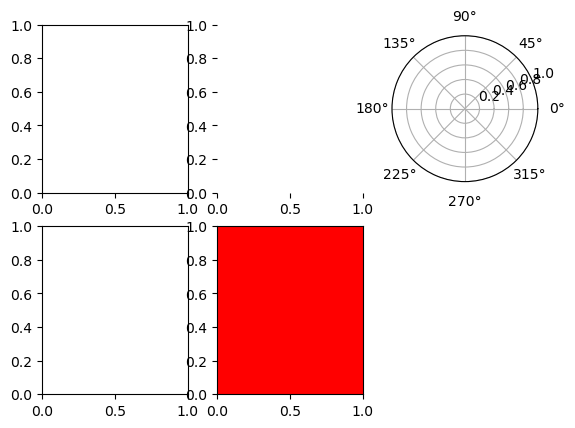

In [186]:
fig = plt.figure()

fig.add_subplot(231)
ax1 = fig.add_subplot(2, 3, 1)  # equivalent but more general

fig.add_subplot(232, frameon=False)  # subplot with no frame
fig.add_subplot(233, projection='polar')  # polar subplot
fig.add_subplot(234, sharex=ax1)  # subplot sharing x-axis with ax1
fig.add_subplot(235, facecolor="red")  # red subplot

ax1.remove()  # delete ax1 from the figure
# fig.add_subplot(ax1)  # add ax1 back to the figure       #마지막 줄 에러 남